### Imports

In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import ClassificationModel, EmbeddingsModel, SiameseModel
from trainer import SiameseTrainerCombinationDataset, all_subjects_intense

import torch
import json


### Set Hyperparameters

In [2]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\INTENSE\\normalized_subjects_no_outliner.pkl",
    "subjects_train": all_subjects_intense,
    "subjects_test": all_subjects_intense,
    "wandb": False,
    "log": True,
    "learning_rate": 0.01,
    "batch_size": 256,
    "batch_size_test": 256,
    "freeze_embed": False,
    "dataset_ignore_subject_train": True,
    "dataset_ignore_subject_test": False,
    "decision_function": 0,
    "filter": [],
    "weight_decay": 0.001,
    "lr_steps": 5,
    "adam": True,
    "number_steps": 200,
    "number_steps_testing": None,
    "number_steps_histogramm": None
}

model_embedding_hyperparameter = {
        "sigmoid": False,
        "dropout": 0.35,
        "layers": [207, 512, 64]
}

model_classifier_hyperparameter = {
    "dropout": 0.35,
    "layers": [64, 32]
}

### Init models

In [24]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

siamese_model = SiameseModel(embedding_model, classifier_model, decision_function=trainer_hyperparameter["decision_function"])

_ = siamese_model.load_state_dict(torch.load("D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\TransferLearning\pretrained_models\model_phasic_electric.pth"))

In [25]:
trainer = SiameseTrainerCombinationDataset(trainer_hyperparameter, siamese_model, device="cuda:0")

### start training

In [26]:
results = trainer.test()

100%|██████████| 38/38 [00:16<00:00,  2.24it/s]


### plot additional result data

In [27]:
cm = results["cm"]
print("acc:", results["acc"])

acc: 0.4880327524669326


In [28]:
trainer.calculate_f_scores(cm)

{'recall': 0.5029385171790235,
 'precision': 0.4538037935957577,
 'f1': 0.4771094671384153}

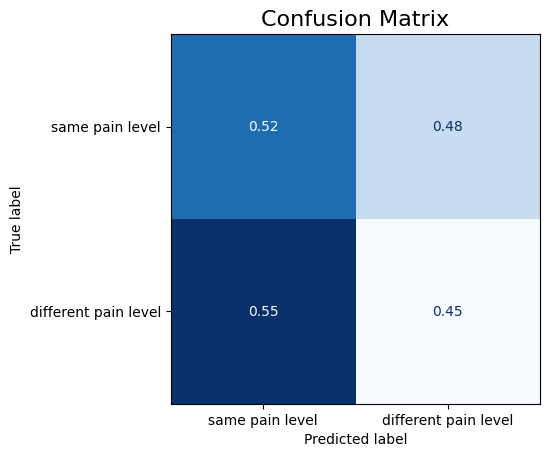

In [29]:
trainer.plot_cm(cm)